In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [17]:
# Loading sample car crash data from seaborn
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# KNN Regression

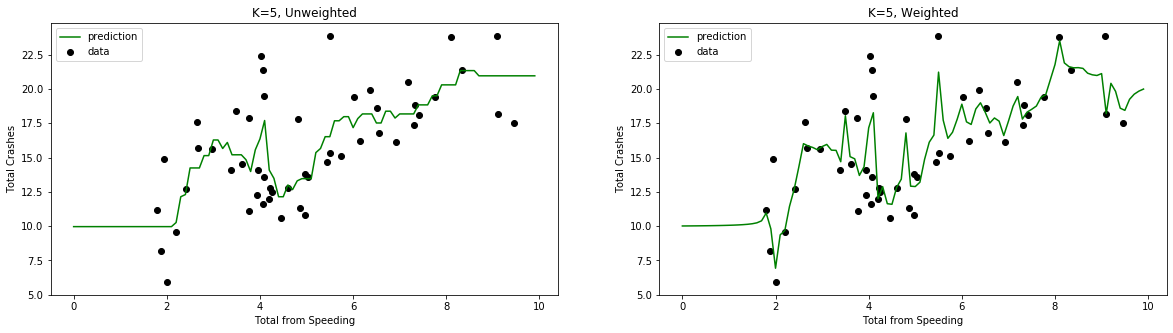

Unweighted Accuracy: 0.18 (+/- 0.75)
Weighted Accuracy: -0.08 (+/- 1.25)


In [23]:
n_neighbor = 5
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
X = pd.DataFrame(df['speeding'])
Y = df['total']
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Unweighted'.format(n_neighbor))
plt.xlabel('Total from Speeding')
plt.ylabel('Total Crashes')

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor, weights='distance')
knn_w.fit(X, Y)

Y_ = knn_w.predict(T)


plt.subplot(1, 2, 2)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Weighted'.format(n_neighbor))
plt.xlabel('Total from Speeding')
plt.ylabel('Total Crashes')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted and unweighted models are not very accurate for this dataset with k = 5.  Lets try and compare it to k = 10.

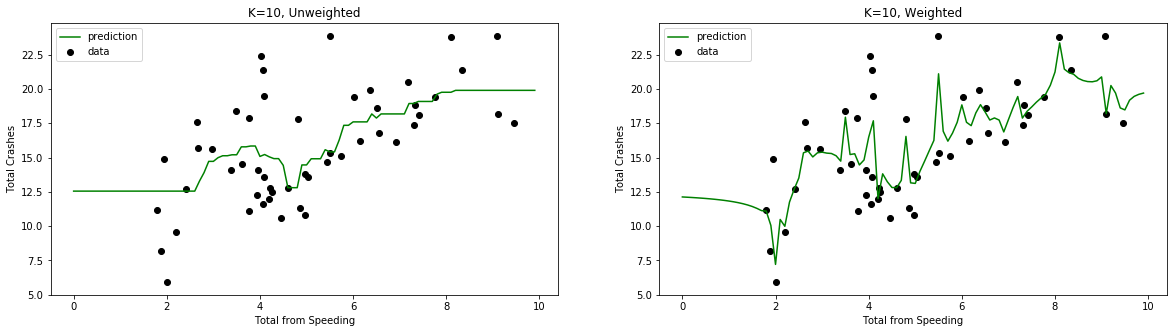

Unweighted Accuracy: 0.24 (+/- 0.34)
Weighted Accuracy: 0.02 (+/- 0.94)


In [24]:
n_neighbor=10
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
#X = pd.DataFrame(df['total'])
#Y = df['speeding']
knn.fit(X, Y)

# Set up our prediction line.
#T = np.arange(5, 25, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Unweighted'.format(n_neighbor))
plt.xlabel('Total from Speeding')
plt.ylabel('Total Crashes')

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor, weights='distance')
knn_w.fit(X, Y)

Y_ = knn_w.predict(T)


plt.subplot(1, 2, 2)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Weighted'.format(n_neighbor))
plt.xlabel('Total from Speeding')
plt.ylabel('Total Crashes')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Accuracy is still very low for both Unweighted and Weighted KNN regression models.

# OLS Regression

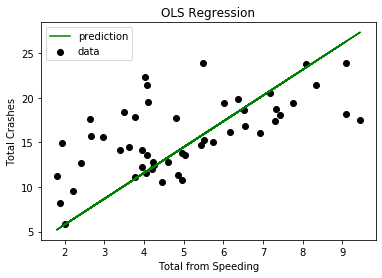

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  total   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              528.7
Date:                Fri, 17 Apr 2020   Prob (F-statistic):                    3.03e-28
Time:                        22:13:59   Log-Likelihood:                         -152.30
No. Observations:                  51   AIC:                                      306.6
Df Residuals:                      50   BIC:                                      308.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speeding       2.8961      0.126     22.994      0.000       2.643       3.149
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.651
Skew:                           0.220   Prob(JB):                        0.722
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results = sm.OLS(Y, X).fit()


plt.scatter(X, Y, c='k', label='data')
plt.plot(X, results.fittedvalues, c='g', label='prediction')
plt.legend()
plt.title('OLS Regression')
plt.xlabel('Total from Speeding')
plt.ylabel('Total Crashes')
plt.show()
results.summary()

The OLS model fits better, R-squared is close to 1 indicating a good fit.  We would expect to see this, as speeding crashes increase so should the total amount of crashes.

I would use more rubust data that is not directly linked to each other.  KNN does not fit the data well, but it does indicate an increase as there is and increase in speeding crashes.